<h1>Imports</h1>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap

<h1>Importing dataset</h1>

In [2]:
path = "/media/cipher/EEC07807C077D3F5/Scikit and PyTorch/Datasets/iris.data"
df = pd.read_csv(path, header=None)
display(df)

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
np.unique(df.iloc[:, 4].values)

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

<h1>VIsualizing data</h1>

[]

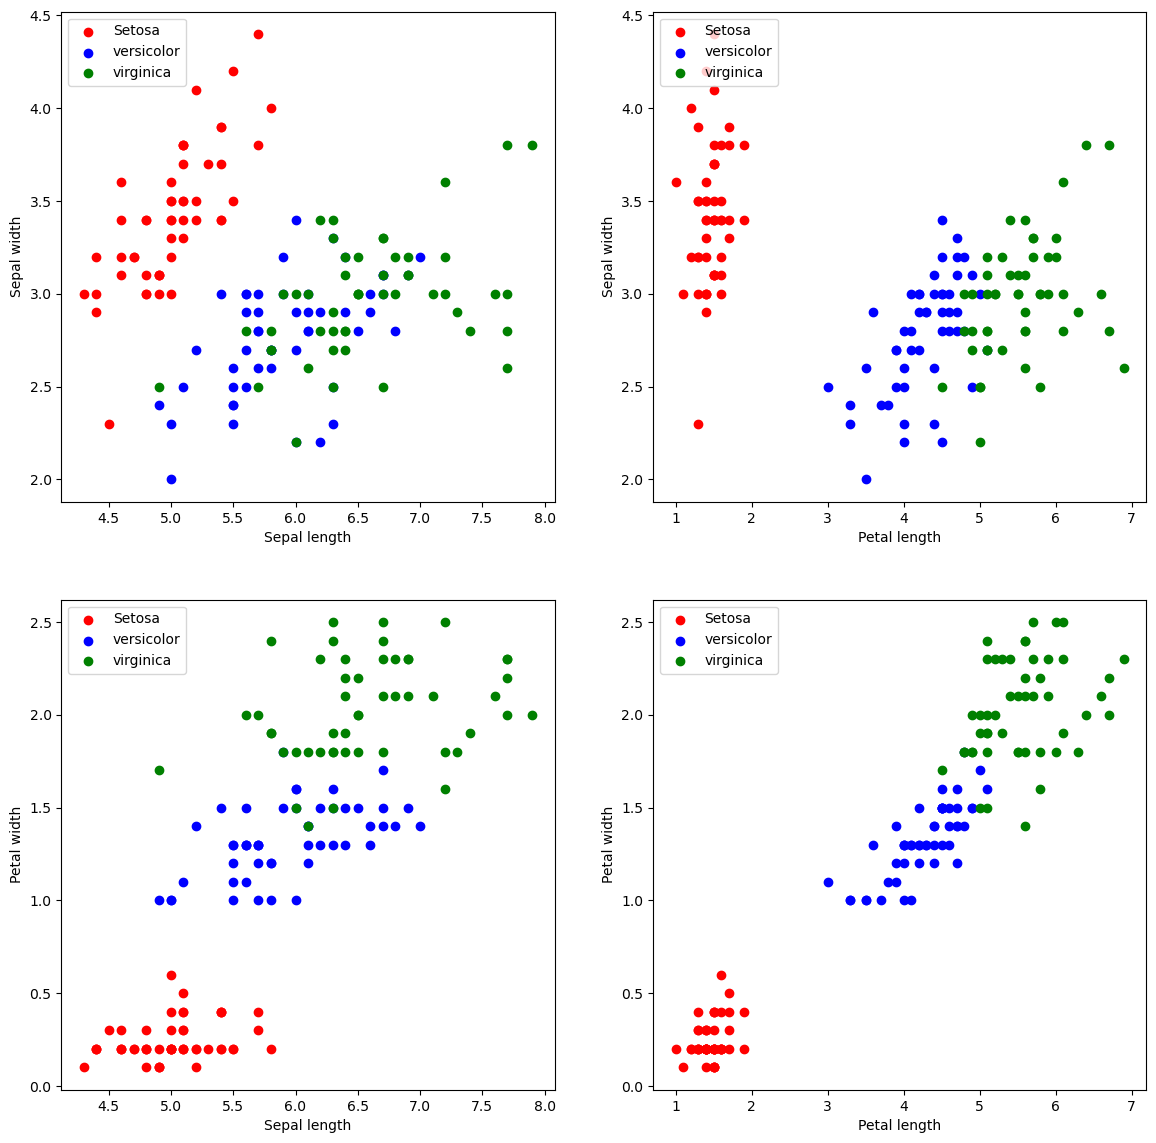

In [4]:
plt.rcParams['figure.figsize'] = [14, 14]
plt.subplot(2,2,1)
plt.scatter(df.iloc[:50, 0], df.iloc[:50, 1], color = "red", label = "Setosa")
plt.scatter(df.iloc[50:100, 0], df.iloc[50:100, 1], color = "blue", label = "versicolor")
plt.scatter(df.iloc[100:, 0], df.iloc[100:, 1], color = "green", label = "virginica")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.legend(loc='upper left')
plt.plot()

plt.subplot(2,2,2)
plt.scatter(df.iloc[:50, 2], df.iloc[:50, 1], color = "red", label = "Setosa")
plt.scatter(df.iloc[50:100, 2], df.iloc[50:100, 1], color = "blue", label = "versicolor")
plt.scatter(df.iloc[100:, 2], df.iloc[100:, 1], color = "green", label = "virginica")
plt.xlabel("Petal length")
plt.ylabel("Sepal width")
plt.legend(loc='upper left')
plt.plot()

plt.subplot(2,2,3)
plt.scatter(df.iloc[:50, 0], df.iloc[:50, 3], color = "red", label = "Setosa")
plt.scatter(df.iloc[50:100, 0], df.iloc[50:100, 3], color = "blue", label = "versicolor")
plt.scatter(df.iloc[100:, 0], df.iloc[100:, 3], color = "green", label = "virginica")
plt.xlabel("Sepal length")
plt.ylabel("Petal width")
plt.legend(loc='upper left')
plt.plot()

plt.subplot(2,2,4)
plt.scatter(df.iloc[:50, 2], df.iloc[:50, 3], color = "red", label = "Setosa")
plt.scatter(df.iloc[50:100, 2], df.iloc[50:100, 3], color = "blue", label = "versicolor")
plt.scatter(df.iloc[100:, 2], df.iloc[100:, 3], color = "green", label = "virginica")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc='upper left')
plt.plot()


<h2>Observing the graphs, one can conclude that petal width v/s petal length graph is the most optimal for training, so we choose only petal width and length data</h2> 

In [5]:
subset_df = df.iloc[:, 2:]
column_dict = {2 : 0, 3 : 1, 4 : 2}
subset_df.rename(columns=column_dict, inplace=True)
display(subset_df)

,0,1,2
0,1.4,0.2,Iris-setosa
1,1.4,0.2,Iris-setosa
2,1.3,0.2,Iris-setosa
3,1.5,0.2,Iris-setosa
4,1.4,0.2,Iris-setosa
...,...,...,...
145,5.2,2.3,Iris-virginica
146,5.0,1.9,Iris-virginica
147,5.2,2.0,Iris-virginica
148,5.4,2.3,Iris-virginica


<h2>Standardizing the subset data</h2>

In [6]:
standardized_subset_df = subset_df.copy()
standardized_subset_df.iloc[:, 0] = (standardized_subset_df.iloc[:, 0] - standardized_subset_df.iloc[:, 0].mean()) / (standardized_subset_df.iloc[:, 0].std())
standardized_subset_df.iloc[:, 1] = (standardized_subset_df.iloc[:, 1] - standardized_subset_df.iloc[:, 1].mean()) / (standardized_subset_df.iloc[:, 1].std())
display(standardized_subset_df)

,0,1,2
0,-1.336794,-1.308593,Iris-setosa
1,-1.336794,-1.308593,Iris-setosa
2,-1.393470,-1.308593,Iris-setosa
3,-1.280118,-1.308593,Iris-setosa
4,-1.336794,-1.308593,Iris-setosa
...,...,...,...
145,0.816888,1.443121,Iris-virginica
146,0.703536,0.918985,Iris-virginica
147,0.816888,1.050019,Iris-virginica
148,0.930239,1.443121,Iris-virginica


<h2>Visualizing training data</h2>

[]

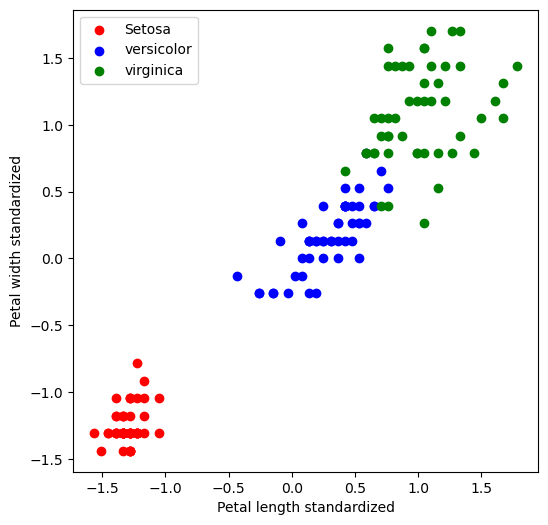

In [7]:
plt.rcParams['figure.figsize'] = [6, 6]
plt.scatter(standardized_subset_df.iloc[:50, 0], standardized_subset_df.iloc[:50, 1], color = "red", label = "Setosa")
plt.scatter(standardized_subset_df.iloc[50:100, 0], standardized_subset_df.iloc[50:100, 1], color = "blue", label = "versicolor")
plt.scatter(standardized_subset_df.iloc[100:, 0], standardized_subset_df.iloc[100:, 1], color = "green", label = "virginica")
plt.xlabel("Petal length standardized")
plt.ylabel("Petal width standardized")
plt.legend(loc='upper left')
plt.plot()

<h2>Creating training datasets for 3 sub classifiers</h2>

In [8]:
standardized_subset_df_setosa = standardized_subset_df.copy()
standardized_subset_df_setosa.iloc[standardized_subset_df[2]=="Iris-setosa", 2] = 1
standardized_subset_df_setosa.iloc[standardized_subset_df[2]!="Iris-setosa", 2] = 0

standardized_subset_df_versicolor = standardized_subset_df.copy()
standardized_subset_df_versicolor.iloc[standardized_subset_df[2]=="Iris-versicolor", 2] = 1
standardized_subset_df_versicolor.iloc[standardized_subset_df[2]!="Iris-versicolor", 2] = 0

standardized_subset_df_virginica = standardized_subset_df.copy()
standardized_subset_df_virginica.iloc[standardized_subset_df[2]=="Iris-virginica", 2] = 1
standardized_subset_df_virginica.iloc[standardized_subset_df[2]!="Iris-virginica", 2] = 0

print("\nSetosa data\n")
print(standardized_subset_df_setosa.to_string())
print("\nVersicolor data\n")
print(standardized_subset_df_versicolor.to_string())
print("\nVirginica data\n")
print(standardized_subset_df_virginica.to_string())


Setosa data

            0         1  2
0   -1.336794 -1.308593  1
1   -1.336794 -1.308593  1
2   -1.393470 -1.308593  1
3   -1.280118 -1.308593  1
4   -1.336794 -1.308593  1
5   -1.166767 -1.046525  1
6   -1.336794 -1.177559  1
7   -1.280118 -1.308593  1
8   -1.336794 -1.308593  1
9   -1.280118 -1.439627  1
10  -1.280118 -1.308593  1
11  -1.223442 -1.308593  1
12  -1.336794 -1.439627  1
13  -1.506822 -1.439627  1
14  -1.450146 -1.308593  1
15  -1.280118 -1.046525  1
16  -1.393470 -1.046525  1
17  -1.336794 -1.177559  1
18  -1.166767 -1.177559  1
19  -1.280118 -1.177559  1
20  -1.166767 -1.308593  1
21  -1.280118 -1.046525  1
22  -1.563497 -1.308593  1
23  -1.166767 -0.915491  1
24  -1.053415 -1.308593  1
25  -1.223442 -1.308593  1
26  -1.223442 -1.046525  1
27  -1.280118 -1.308593  1
28  -1.336794 -1.308593  1
29  -1.223442 -1.308593  1
30  -1.223442 -1.308593  1
31  -1.280118 -1.046525  1
32  -1.280118 -1.439627  1
33  -1.336794 -1.308593  1
34  -1.280118 -1.439627  1
35  -1.450146 

<h2>Shuffling data</h2>

In [9]:
standardized_subset_df_setosa = standardized_subset_df_setosa.sample(frac=1).reset_index(drop=True)
standardized_subset_df_versicolor = standardized_subset_df_versicolor.sample(frac=1).reset_index(drop=True)
standardized_subset_df_virginica = standardized_subset_df_virginica.sample(frac=1).reset_index(drop=True)

<h2>Sub Classifier class</h2>

In [10]:
class sub_Perceptron:
    def __init__(self, etta, n_iter):
        self.etta = etta
        self.n_iter = n_iter
        self.iter_error = np.int64(0)
        self.total_error = np.zeros((n_iter,), dtype=int)
        self.objective_function = np.float32(0)
        
    def fit(self, x, y):
        self.weights = np.random.normal(loc=0.0, scale=0.01, size=x.shape[1])
        self.bias = np.float64(0.0)

        for i in range(self.n_iter):
            for feature,target in zip(x,y):
                prediction = self.predict_output(feature)
                self.optimizer(prediction, target, feature)
            self.total_error[i] = self.iter_error
            self.iter_error = np.int64(0)

    def predict_output(self, feature):
        self.objective_function = self.weights.dot(feature) + self.bias
        if self.objective_function > 0.5:
            return 1
        else :
            return 0

    def batch_predict(self, features):
        test_results = np.empty(features.shape[0])
        for idx,feature in enumerate(features):
            test_results[idx] = self.predict_output(feature)
        return test_results

    def optimizer(self, prediction, target, feature):
        if prediction!= target:
            #print("Error occured, prediction = {}, target = {}".format(prediction, target))
            self.iter_error += 1
            #print(self.weights.shape[0])
            for j in range(self.weights.shape[0]):   
                self.weights[j] += self.etta*(target - prediction)*feature[j] 
            self.bias += self.etta*(target - prediction)

<h2>Training the sub classfiers</h2>

In [11]:
setosa_ppn = sub_Perceptron(0.1, 10)
setosa_ppn.fit(standardized_subset_df_setosa.iloc[:, 0:2].values, standardized_subset_df_setosa.iloc[:, 2].values)

versicolor_ppn = sub_Perceptron(0.01, 40)
versicolor_ppn.fit(standardized_subset_df_versicolor.iloc[:, 0:2].values, standardized_subset_df_versicolor.iloc[:, 2].values)

virginica_ppn = sub_Perceptron(0.01, 40)
virginica_ppn.fit(standardized_subset_df_virginica.iloc[:, 0:2].values, standardized_subset_df_virginica.iloc[:, 2].values)

<h2>Graphing errors per iteration</h2>

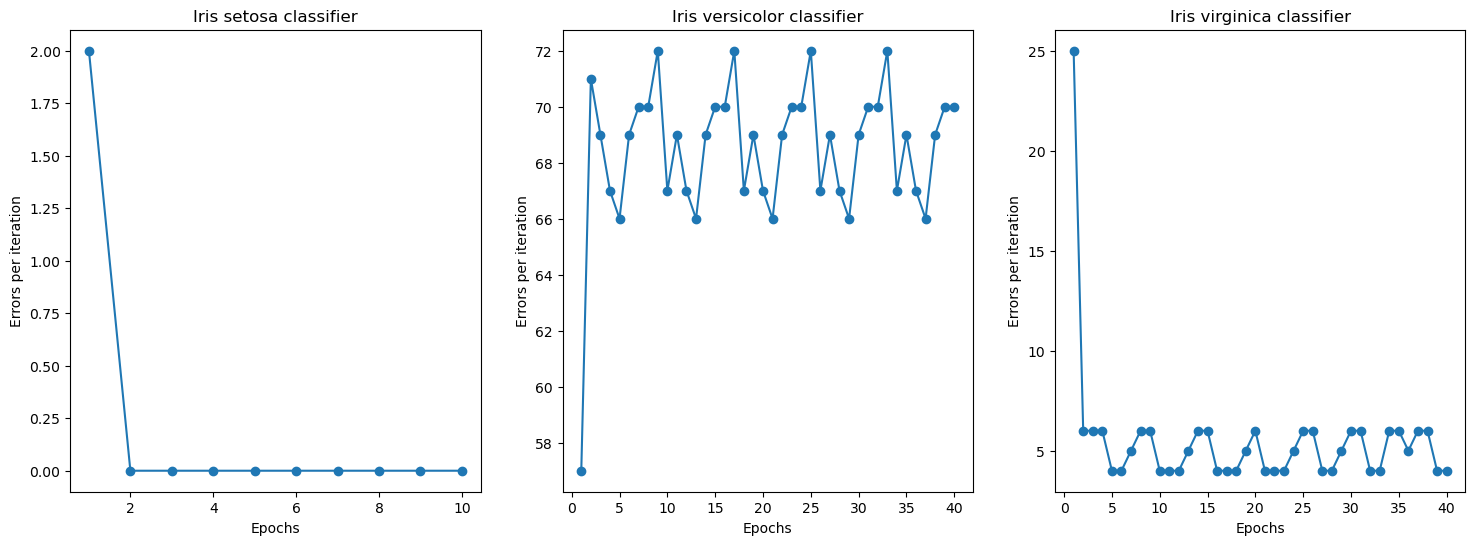

In [12]:
plt.rcParams['figure.figsize'] = [18, 6]
plt.subplot(1,3,1)
plt.title("Iris setosa classifier")
plt.xlabel('Epochs')
plt.ylabel('Errors per iteration')
plt.plot(range(1, len(setosa_ppn.total_error) + 1), setosa_ppn.total_error, marker='o')

plt.subplot(1,3,2)
plt.title("Iris versicolor classifier")
plt.xlabel('Epochs')
plt.ylabel('Errors per iteration')
plt.plot(range(1, len(versicolor_ppn.total_error) + 1), versicolor_ppn.total_error, marker='o')

plt.subplot(1,3,3)
plt.title("Iris virginica classifier")
plt.xlabel('Epochs')
plt.ylabel('Errors per iteration')
plt.plot(range(1, len(virginica_ppn.total_error) + 1), virginica_ppn.total_error, marker='o')

<h2>Visualizing the decision boundaries</h2>

In [13]:
def plot_decision_regions(x, y, classifier, title, resolution=0.01):
    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    x2_min, x2_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    lab = classifier.batch_predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=x[y == cl, 0], y=x[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=f'Class {cl}', edgecolor='black')
    plt.xlabel('Petal length standardized[cm]')
    plt.ylabel('Petal width standardized[cm]')
    plt.legend(loc='upper left')
    plt.title(title)
    plt.plot()

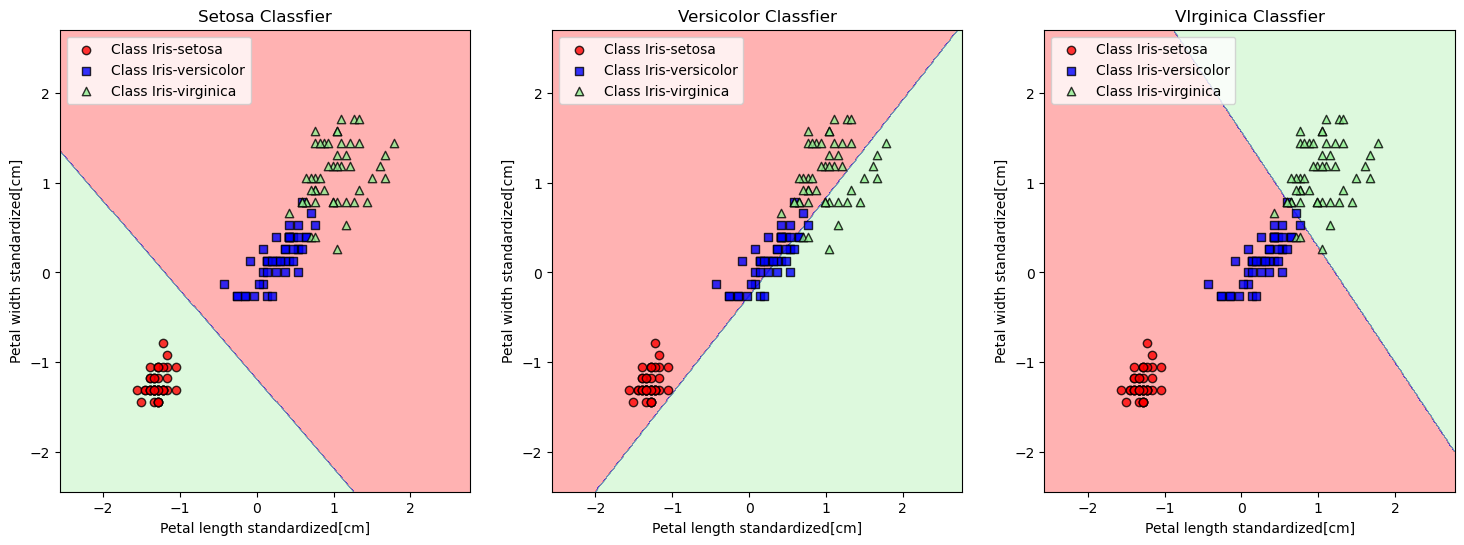

In [14]:
plt.subplot(1,3,1)
plot_decision_regions(standardized_subset_df.iloc[:, 0:2].values, standardized_subset_df.iloc[:, 2].values, classifier=setosa_ppn, title="Setosa Classfier")
plt.subplot(1,3,2)
plot_decision_regions(standardized_subset_df.iloc[:, 0:2].values, standardized_subset_df.iloc[:, 2].values, classifier=versicolor_ppn, title="Versicolor Classfier")
plt.subplot(1,3,3)
plot_decision_regions(standardized_subset_df.iloc[:, 0:2].values, standardized_subset_df.iloc[:, 2].values, classifier=virginica_ppn, title="VIrginica Classfier")

<h3>From the above plots, it is clear that versicolor classfier is unable to train, but setosa and virginica are giving correct answers, so we create a perceptron that can detect setosa and virginica. If the classfier detects neither setosa nor virginica, then it has to be versicolor</h3>

In [15]:
# 0 = setosa
# 1 = versicolor
# 2 = virginica

class Perceptron:
    def __init__(self, ppn1, ppn2, ppn3):
        self.ppn1 = ppn1
        self.ppn2 = ppn2
        self.ppn3 = ppn3
        self.error = np.int64(0)
        self.decision_array = np.zeros(3, dtype=float)

    def predict_output(self, feature):
        self.ppn1.predict_output(feature)
        self.ppn2.predict_output(feature)
        self.ppn3.predict_output(feature)
        self.decision_array[0] = self.ppn1.objective_function
        self.decision_array[1] = 0.5
        self.decision_array[2] = self.ppn3.objective_function
        #print(self.decision_array)
        return self.decision_array.argmax()

    def batch_predict(self, features):
        test_results = np.empty(features.shape[0])
        for idx,feature in enumerate(features):
            test_results[idx] = self.predict_output(feature)
        return test_results

    def calculate_error(self, target, prediction):
        if target.shape[0] != prediction.shape[0]:
            print("array size mismatch")
            return
        for idx in range(0, target.shape[0]):
            if(target[idx] != prediction[idx]):
                self.error += 1
        print("Total predictions = {}, no. of errors = {}".format(target.shape[0], self.error))

<h2>Visualizing the combined decision boundary</h2>

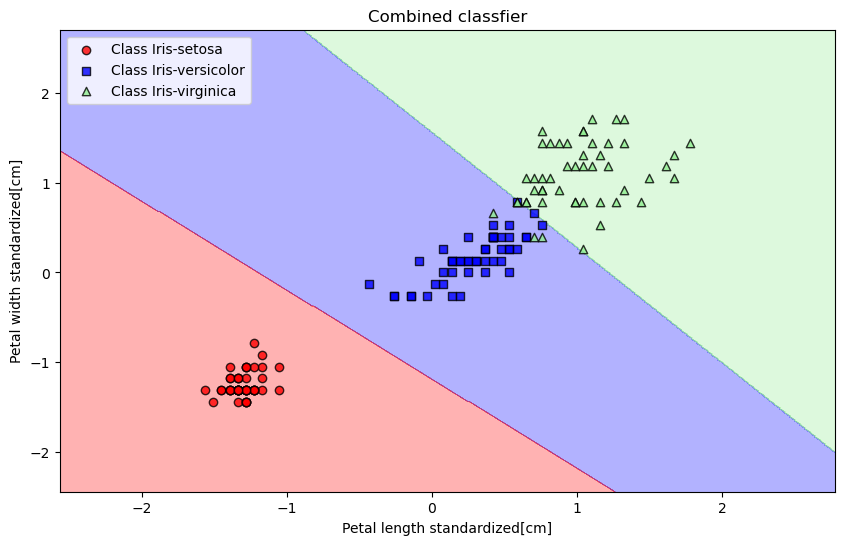

In [16]:
plt.rcParams['figure.figsize'] = [10, 6]
ppn = Perceptron(setosa_ppn, versicolor_ppn, virginica_ppn)
plot_decision_regions(standardized_subset_df.iloc[:, 0:2].values, standardized_subset_df.iloc[:, 2].values, classifier=ppn, title="Combined classfier")